# Assignment 2

The purpose of this assignment is to test your understanding of Classification.  You will use the Titanic dataset and your goal is to predict whether a passenger Survives based on the passenger's features.


# Instructions

## General

1. Use the same train  dataset as was used in the lecture.  Instructions below for where to find them.

2. As usual: your grade depends on **both** the correct answer and properly presenting your process (as in the "Recipe" taught in class, and the Geron book Appendix B)

3. You will classify whether a passenger Survives or not using Logistic Regression.

4. You may use the code presented in class to **start** your assignment but I expect you to significantly enhance it.  For example: you may use my code to get you started with plotting but it is up to you to decide whether this alone suffices.

5. Use 5-fold cross validation for all models.  Report the average as your result.


## Specific goals to address

1. Use a baseline model against which you will compare your models.
    - Discuss your choice.  Is this the best baseline model to use ?
    - Create a variable SCORE_BASELINE that contains a Python scalar value: the accuracy for your baseline model.
2. You will conduct several experiments 
    - present a Confusion Matrix for each experiment and discuss
    - you will create several variables per experiment that will be used for grading.
        - The variables for experiment 1 will have suffix "_1". For experiment 2, they will have suffix "_2", etc.
3. Experiment 1
    - You will *extend* the results presented in the lecture
        - use the same features
        - use the same way of dealing with missing features
        - be sure to treat categorical features correctly
     
    - Create a variable SCORE_1 that contains a Python scalar value: the accuracy for your experiment.
    - Create a variable MISCLASSIFIED_SURVIVE_1 that contains a Python list of *at least 10* passengers
        - the list should contain the identity of passengers that were mis-classified as Surviving.
        - the "identity" of a passenger should be given as the  *row number* within the unshuffled **train** data set,
        - The first row is considered row 0
    - Create a variable MISCLASSIFIED_NOT_SURVIVE_1 that contains a Python list of *at least 10* passengers
        - the list should contain the "identity" of passengers that were mis-classified as Not Surviving.
        - The "identity" of a passenger should be given as the  *row number* within the unshuffled **train** data set, as above
4. Experiment 2
    - Turn Age from a continous variable to one that is assigned to buckets.
        - You will decide the range for each bucket.  Discuss your choice
        - Treat the buckets as categorical features
    - Compare your prediction to the previous experiment and discuss
    - Create variables SCORE_2, MISCLASSIFIED_SURVIVE_2, MISCLASSIFIED_NOT_SURVIVE_2 analagous to the variables in Experiment 1
        
The correctness part of your grade will depend on the values you assign to these variables.    

# Extra credit

Create your own Logistic Regression model for the Titanic dataset given !
- Feel free to change **anything**, e.g., features or ways to treat missing values
- We will create a hidden test dataset
- Students whose model accuracy (evaluated on the hidden test dataset) are in the Top 33% of the class get extra credit !


# Getting the data 
You may obtain the train and test datasets from the repository using code from the following cell.

**NOTE** You may need to change the NOTEBOOK_ROOT variable to point to the directory into which you've cloned the repository.  On my machine, it is `~/Notebooks/NYU`.

In [1]:
import pandas as pd
import os

NOTEBOOK_ROOT = ""
TITANIC_PATH = os.path.join( NOTEBOOK_ROOT, "external/jack-dies", "data")

train_data = pd.read_csv( os.path.join(TITANIC_PATH, "train.csv") )
test_data  = pd.read_csv( os.path.join(TITANIC_PATH, "test.csv")  )

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

In [3]:
%matplotlib inline

In [4]:
(num_obs, num_features) = train_data.shape
print("There are {nr} observations and {nf} attributes (including the target)".format(nr=num_obs, nf=num_features) )

There are 891 observations and 12 attributes (including the target)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
def plot_attrs(df, attrs, attr_type="Cat", normalize=True, plot=True):
    """
    Plot/print the distribution of one or more attributes of DataFrame
    
    Parameters
    ----------
    df: DataFrame
    attrs: List of attributes (i.e., column names)
    
    Optional
    --------
    attr_type: String; 
      "Cat" to indicate that the attributes in attrs are Categorical (so use value_counts)
      Otherwise: the attributes must be numeric columns (so use histogram)
    """
    num_attrs = len(attrs)
    ncols=2
    nrows = max(1,round(num_attrs/ncols))
  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*8, num_attrs*4))
    
    # Make sure axes is an array (special case when num_attrs==1)
    if num_attrs == 1:
        axes =np.array( [ axes ])
        
    for i, attr in enumerate(attrs):
        if attr_type == "Cat":
            alpha_bar_chart = 0.55
            plot_data = df.loc[:, attr ].value_counts(normalize=normalize).sort_index()
            
            args = { "kind":"bar" } #, "alpha":alpha_bar_chart}
            kind="bar"
        else:
            plot_data = df.loc[:, [attr] ]
            
            args = { "kind":"hist"}
            if normalize:
                args["density"] = True
            kind="hist"
            
        if plot:
            _ = plot_data.plot(title=attr, ax=axes.flatten()[i], **args)
        else:
            print(attr + "\n")
            print(plot_data)
            print("\n")

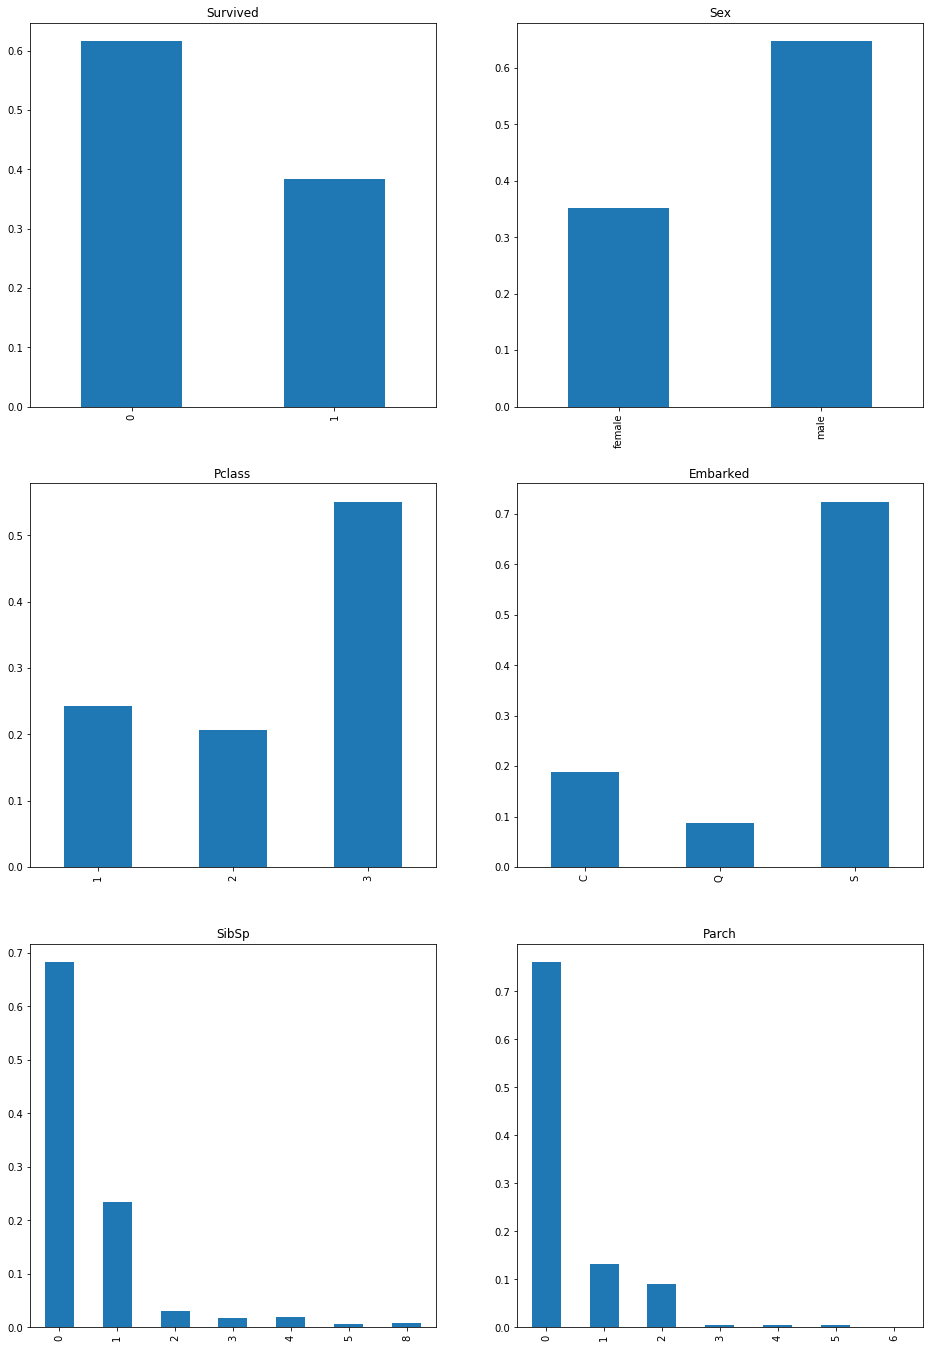

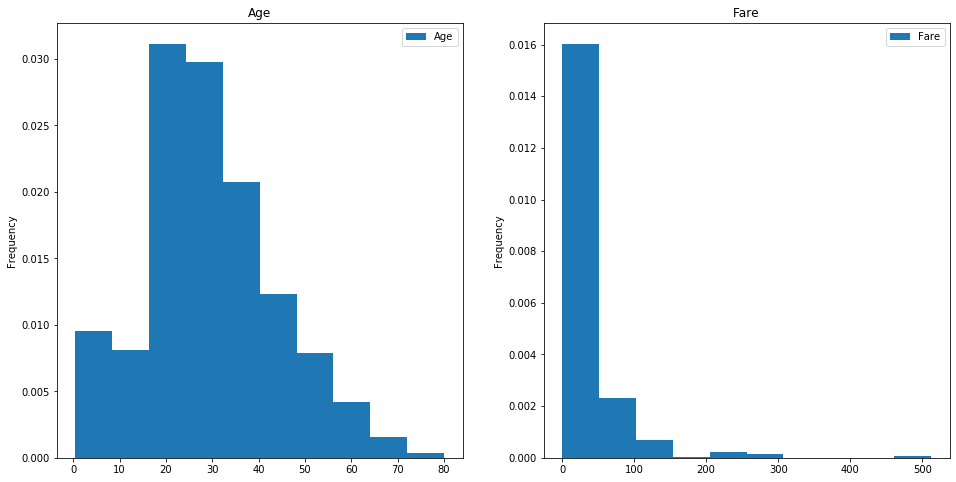

In [9]:
import matplotlib.pyplot as plt
plot_attrs(train_data, [ "Survived", "Sex", "Pclass", "Embarked","SibSp","Parch" ], attr_type="Cat", plot=True)
plot_attrs(train_data, [ "Age" ,"Fare"], attr_type="Num")

In [10]:
def plot_cond( df, var, conds, ax, normalize=True):
    """
    Plot probability of a value in column var of DataFrame df, conditional on conditions expressed in conds
    
    Parameters
    ----------
    df: DataFrame
    var: String.  Name of column in df whose density we will plot
    conds: Dictionary
    - keys are Strings, which are names of columns in df
    - values are values that could be compared with column at the key
    
    
    """
    plot_data = df.copy()
    title_array = []
    
    for cond, val in conds.items():
        title_array.append( "{c}={v}".format(c=cond, v=val))
        plot_data = plot_data.loc[ plot_data.loc[:, cond] == val, : ]
        
        args = { "kind": "bar"}
        
    
    plot_data = plot_data.loc[:, var ]
    
    title = ", ".join(title_array)
    title = "Prob({v} | {t})".format(v=var, t=title)
    plot_data.value_counts(normalize=normalize).sort_index().plot(title=title, ax=ax, **args)
    
def plot_conds(df, specs):
    """
    Print multiple conditional plots using plot_cond
    
    Parameters
    -----------
    df: DataFrame
    specs: List. Each element of the list is a tuple (var, conds)
    -  each element of the list generates a call to plot_cond(df, var, conds)
    """
    num_specs = len(specs)
    ncols=3
    nrows = max(1,round(.4999 + num_specs/ncols))
  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, num_specs*1.5))
    
    # Make sure axes is an array (special case when num_attrs==1)
    if num_specs == 1:
        axes =np.array( [ axes ])
        
    for i, spec in enumerate(specs):
        if spec is None:
            continue
        (var, conds) = spec
        plot_cond(df, var, conds, ax=axes.flatten()[i])

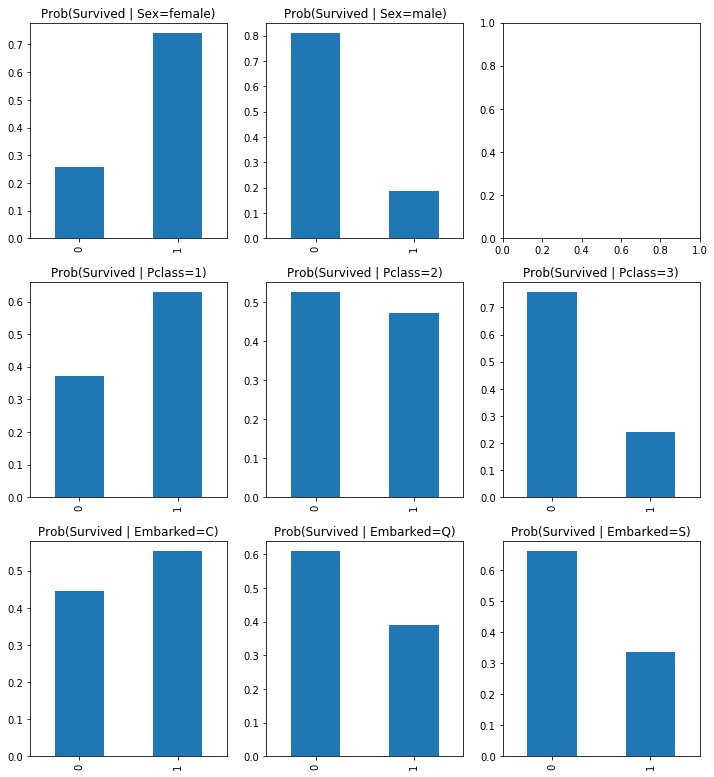

In [11]:
plot_conds(train_data, [ ("Survived", { "Sex": "female"}),
                         ("Survived", { "Sex": "male"}),
                         None,
                         ("Survived", { "Pclass": 1}),
                         ("Survived", { "Pclass": 2}),
                         ("Survived", { "Pclass": 3}),
                        
                         ("Survived", { "Embarked":"C"}),
                         ("Survived", { "Embarked":"Q"}),
                         ("Survived", { "Embarked":"S"}),
                       ]
          )

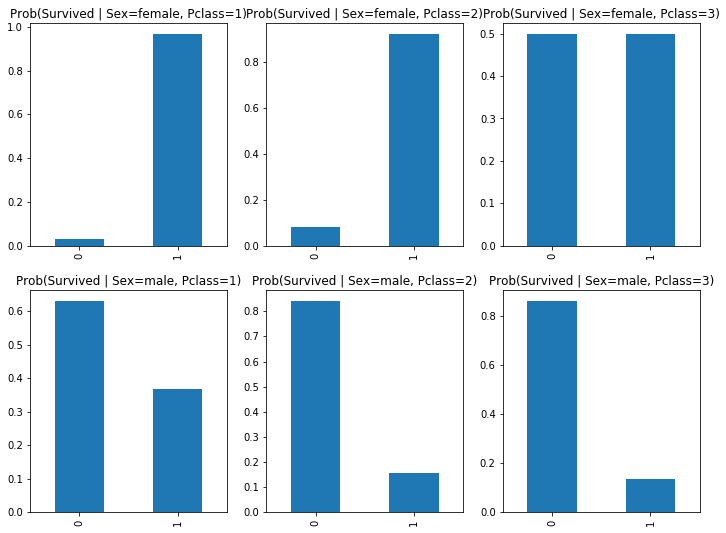

In [12]:
plot_conds(train_data, [
                         ("Survived", { "Sex": "female", "Pclass": 1}),
                         ("Survived", { "Sex": "female", "Pclass": 2}),
                         ("Survived", { "Sex": "female", "Pclass": 3}),
    
                         ("Survived", { "Sex": "male", "Pclass": 1}),
                         ("Survived", { "Sex": "male", "Pclass": 2}),
                         ("Survived", { "Sex": "male", "Pclass": 3}),
                       ])

In [13]:
# Partition by the attribute "Sex"
males   = train_data[ train_data["Sex"] == "male"]
females = train_data[ train_data["Sex"] == "female"]

# Aggregate within each group: count,mean.  n.b., only doing this for the "Survived" column
count_males, count_females = males.shape[0], females.shape[0]
survival_males, survival_females = males["Survived"].mean(), females["Survived"].mean()

print( "male\t{c}\t{m:0.4f}".format(c=count_males, m=survival_males) )
print( "female\t{c}\t{m:0.4f}".format(c=count_females, m=survival_females) )

# Or, use the pd.groupby
train_data.groupby("Sex").agg(["mean", "count"])["Survived"]

male	577	0.1889
female	314	0.7420


,mean,count
Sex,,
female,0.742038,314
male,0.188908,577


# Data Cleaning

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder 

In [15]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [16]:
num_features = ["Age", "SibSp", "Parch", "Fare"]

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector( num_features )),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [17]:
cat_features = ['Sex', 'Pclass', 'Embarked']

In [18]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
    
class SexToInt(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
        return(X)

In [19]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector( cat_features )),
        ("imputer", MostFrequentImputer()),
        ("sex_encoder", SexToInt() ),
    ])

In [20]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector( cat_features )),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [21]:
X_train = preprocess_pipeline.fit_transform(train_data)

In [22]:
import numpy as np
y_train = np.array(train_data["Survived"])

# Baseline Model

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [24]:
dmy_clf = DummyClassifier(strategy="stratified", **{})
acc_scores_dmy = cross_val_score(dmy_clf, X_train, y_train, cv=5, scoring="accuracy")
SCORE_BASELINE = acc_scores_dmy.mean()
SCORE_BASELINE

0.52968422792218

This is not the best baseline model to use. The cross validation score is nealy a half, which is as accurate as a blind guess. If we learned the data artifictially, we could guess all the people would die, which is more accurate than the baseline model.

# Experiment 1

In [25]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

In [26]:
X_train_1=X_train[:,:-3]
expected_1 = y_train
logistic_clf = linear_model.LogisticRegression(solver='liblinear')

In [27]:
scores = cross_val_score(logistic_clf, X_train_1, y_train, cv=5)
SCORE_1 = scores.mean()
SCORE_1

0.7868160254657532

In [28]:
predicted_1 = cross_val_predict(logistic_clf, X_train_1, y_train, cv=5)

In [29]:
confusion_mat_1 = metrics.confusion_matrix(expected_1, predicted_1)


In [30]:
# %load mnist_plot_confusion.py
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        # Normalize by row sums
        cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around( 100 * cm_pct, decimals=0).astype(int)
        
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Plot coordinate system has origin in upper left corner
        # -  coordinates are (horizontal offset, vertical offset)
        # -  so cm[i,j] should appear in plot coordinate (j,i)
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


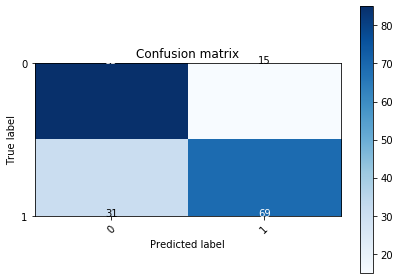

In [31]:
plot_confusion_matrix(confusion_mat_1, range(2),normalize=True)

In [32]:
mask_1_S = (expected_1 == 0) & (expected_1 != predicted_1)
MISCLASSIFIED_SURVIVE_1=list(train_data[mask_1_S].index)
mask_1_NS = (expected_1 == 1) & (expected_1 != predicted_1)
MISCLASSIFIED_NOT_SURVIVE_1=list(train_data[mask_1_NS].index)

# Experiement 2

In [33]:
X_train_2=X_train_1.copy()
X_train_2[:,0] = (X_train_2[:,0]>=18) & (X_train_2[:,0]<=50)
''''
At first, I though that though young people are not strong enough are they are too young to calm down, so they have a smaller chance to survive.
Those ould people are not strong any more so they are not likely to survive either.

However, these thoughs are proved to be wrong in the following experiment.
'''''
scores_2 = cross_val_score(logistic_clf, X_train_2, y_train, cv=5)
SCORE_2 = scores_2.mean()
SCORE_2

0.7845624155299673

Normalized confusion matrix


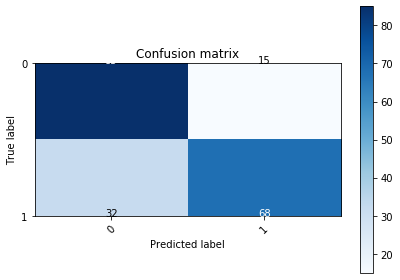

In [34]:
predicted_2=cross_val_predict(logistic_clf, X_train_2, y_train, cv=5)
expected_2 = y_train
confusion_mat_2 = metrics.confusion_matrix(expected_2, predicted_2)
plot_confusion_matrix(confusion_mat_2, range(2),normalize=True)

In [35]:
mask_2_S = (expected_2 == 0) & (expected_2 != predicted_2)
MISCLASSIFIED_SURVIVE_2=list(train_data[mask_2_S].index)
mask_2_NS = (expected_2 == 1) & (expected_2 != predicted_2)
MISCLASSIFIED_NOT_SURVIVE_2=list(train_data[mask_2_NS].index)

# Extra Experiment

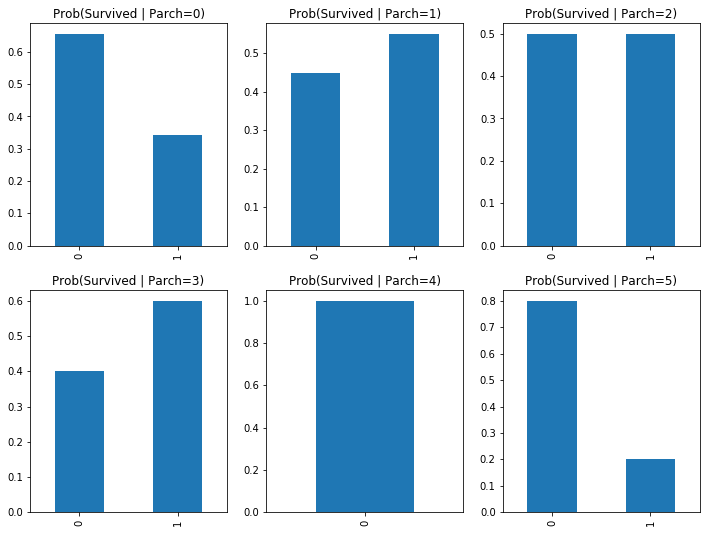

In [36]:
plot_conds(train_data, [ ("Survived", { "Parch": 0}),
                         ("Survived", { "Parch": 1}),
                         ("Survived", { "Parch": 2}),
                         ("Survived", { "Parch": 3}),
                         ("Survived", { "Parch": 4}),
                         ("Survived", { "Parch": 5}),
                       ]
          )

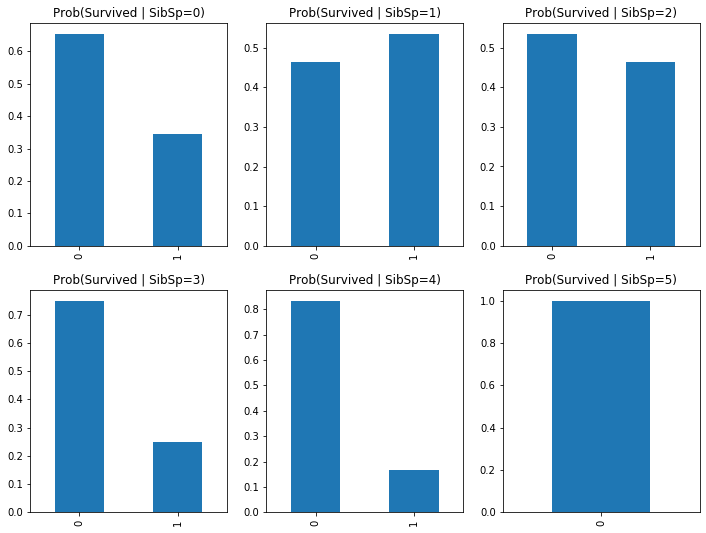

In [37]:
plot_conds(train_data, [ ("Survived", { "SibSp": 0}),
                         ("Survived", { "SibSp": 1}),
                         ("Survived", { "SibSp": 2}),
                         ("Survived", { "SibSp": 3}),
                         ("Survived", { "SibSp": 4}),
                         ("Survived", { "SibSp": 5}),
                       ]
          )

In [38]:
scores_3 = cross_val_score(logistic_clf, X_train, y_train, cv=5)
SCORE_3 = scores_3.mean()
SCORE_3

0.7913041304183615

Normalized confusion matrix


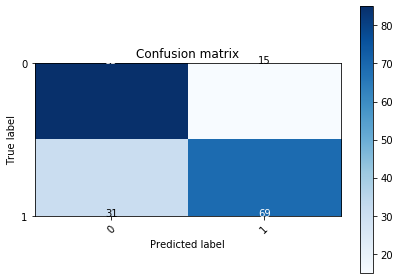

In [39]:
predicted_3=cross_val_predict(logistic_clf, X_train, y_train, cv=5)
expected_3 = y_train
confusion_mat_3 = metrics.confusion_matrix(expected_3, predicted_3)
plot_confusion_matrix(confusion_mat_3, range(2),normalize=True)

In [40]:
mask_3_S = (expected_3 == 0) & (expected_3 != predicted_3)
MISCLASSIFIED_SURVIVE_3=list(train_data[mask_3_S].index)
mask_3_NS = (expected_3 == 1) & (expected_3 != predicted_3)
MISCLASSIFIED_NOT_SURVIVE_3=list(train_data[mask_3_NS].index)

I know that I could not get the reward because I the model is simple and I did not get a very high cross validation score, but I still decide to put out my result because I really to the job. Honestly, I draw the gragh of chances of survival against age and fare and fill them into several categories. But the new model does not behave as well as this simple one. Life is always like this.


# Prediction

In [41]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
X_test = preprocess_pipeline.fit_transform(test_data)

In [44]:
logistic_clf.fit(X_train, y_train)
y_pred= logistic_clf.predict(X_test)

In [45]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,